## Programming Lab #2
## Foundations of Machine Learning

The purpose of this project is to build predictive algorithms that predict the likelihood a person has a stroke. The data include:
  
  - `age`: Patient age, numeric
  - `avg_glucose_level`: Blood sugar levels, numeric
  - `bmi`: Body mass index, numeric
  - `ever_married`: Ever married, dummy/character (Yes, No)
  - `gender`: Male, Female, or Other, character
  - `heart_disease`: Has heart disease, dummy
  - `hypertension`: Has hypertension, dummy
  - `id`: Study identification number
  - `Residence_type`: Type of residence, dummy/character (Urban, Rural)
  - `smoking_status`: Former, never, or current smoker, categorical
  - `work_type`: Employment type (Never worked (Never_worked), homemaker ("children"), Public sector employment (Govt_job), Private sector employment (`Private`), Self-employed (`Self-employed`)
  - `stroke`: Suffered a stroke in the sample period
  
The data come in two files: `training_data.csv`, which you should use to build your models, and `testing_data.csv`, which you should use to test your models. The models must be trained on the training data and tested on the testing data, but providing both files allows you to experiment with your choices and iterate on model designs. If performance drops on the testing data, you know there's a problem.
  
You can use any of the tools presented in class: $k$ nearest neighbor, linear models, or decision trees. In principle, $k$ means clustering might also be helpful for looking for patterns in the data that the other methods might miss. Using canned versions of more advanced tools (boosting, bagging, random forests, neural networks, etc.) is deeply unsporting and thus not allowed. You can be creative about transforming variables, or combining decision trees with linear models or $k$NN. Try something interesting. Fail extravagantly. The goal is to work on an intellectually interesting question that is similar to the tasks that data scientists are called on to do every day.
  
We will compare the groups' models to see if there are common trends or significant differences, and also to declare **The Winners** on the basis of whichever team achieves the lowest $RMSE$ on the testing data. A simple linear model with some polynomials and dummy variables achieves an $R^2$ of .087 and a $RMSE$ of .206.

In [4]:
! git clone https://github.com/LexiVanMetre/group7

Cloning into 'group7'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 40 (delta 3), reused 0 (delta 0), pack-reused 31
Receiving objects: 100% (40/40), 3.61 MiB | 9.79 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [33]:
import pandas as pd
import numpy as np
np.random.seed(1107)
df_train = pd.read_csv('/content/group7/project_2/data/training_data.csv')
df_test = pd.read_csv('/content/group7/project_2/data/testing_data.csv')

In [34]:
df_train.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2465,68685,Male,36.0,0,0,Yes,Govt_job,Urban,65.87,32.2,formerly smoked,0
1,4311,59058,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked,0
2,2375,46068,Male,58.0,0,0,No,Self-employed,Rural,170.93,30.7,Unknown,0
3,5017,36837,Female,61.0,0,0,Yes,Self-employed,Urban,69.88,27.1,never smoked,0
4,753,30550,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown,0


I will first take each variable and change them into a numerical value. This way we can use all the variables in a classification tree.

In [35]:
#ever_married to 0 (no) and 1 (yes): Numerical Dummy
df_train['ever_married'] = df_train['ever_married'].replace({"No":0, "Yes":1})
df_test['ever_married'] = df_test['ever_married'].replace({"No":0, "Yes":1})

In [36]:
# Residence_type (0: Urban, 1:Rural): Numerical Dummy
df_train['Residence_type'] = df_train['Residence_type'].replace({"Urban":0, "Rural":1})
df_test['Residence_type'] = df_test['Residence_type'].replace({"Urban":0, "Rural":1})

In [37]:
# Gender (0:male, 1:female, 2:other): Numerical
df_train['gender'] = df_train['gender'].replace({"Male":0, "Female":1, "Other":2})
df_test['gender'] = df_test['gender'].replace({"Male":0, "Female":1, "Other":2})

In [38]:
#transforming smoking status variable to numeric (0:never, 1:formerly, 2:smokes, 3:unknown)
df_train['smoking_status'] = df_train['smoking_status'].replace({"never smoked":0, "formerly smoked":1, "smokes":2,
                                                          "Unknown":3})
df_test['smoking_status'] = df_test['smoking_status'].replace({"never smoked":0, "formerly smoked":1, "smokes":2,
                                                          "Unknown":3})

In [39]:
df_train['work_type'] = df_train['work_type'].replace({"Never_worked":0, "children":1, "Govt_job":2,
                                                          "Private":3, "Self-employed":4})
df_test['work_type'] = df_test['work_type'].replace({"Never_worked":0, "children":1, "Govt_job":2,
                                                          "Private":3, "Self-employed":4})

In [40]:
df_train.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2465,68685,0,36.0,0,0,1,2,0,65.87,32.2,1,0
1,4311,59058,1,45.0,0,0,1,2,1,68.66,25.3,0,0
2,2375,46068,0,58.0,0,0,0,4,1,170.93,30.7,3,0
3,5017,36837,1,61.0,0,0,1,4,0,69.88,27.1,0,0
4,753,30550,1,78.0,0,0,0,3,0,103.86,30.6,3,0


In [41]:
y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())

Classification Tree

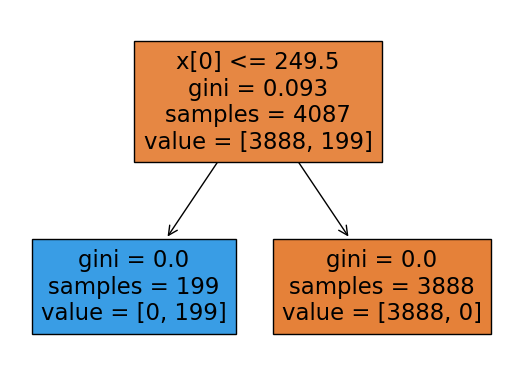

<ipython-input-42-3148cd1b053c>:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(residuals_cart)


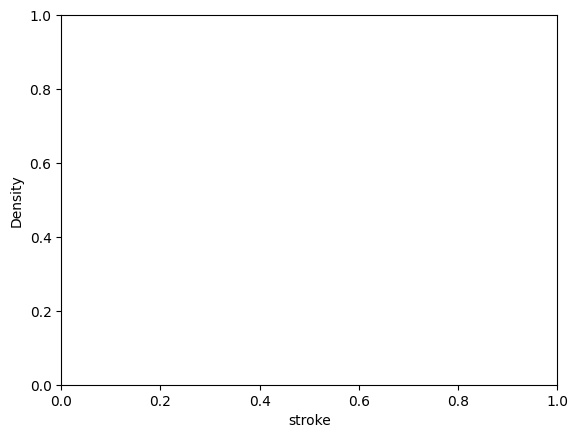

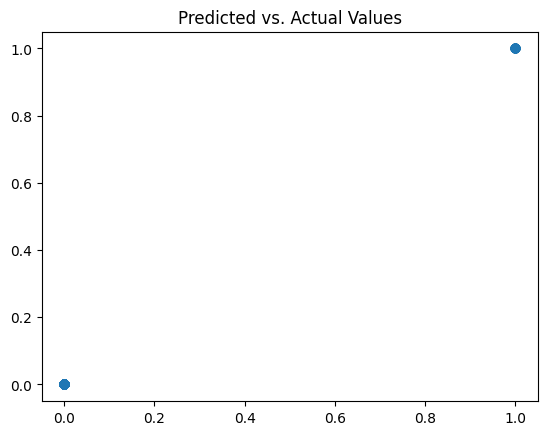

RMSE: 0.0
R2: 1.0


In [42]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

TSS = np.sum( (y_test - y_test.mean())**2 )
N_test = len(y_test)

model = tree.DecisionTreeClassifier(max_depth=5)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

## Residual plot:
sns.kdeplot(residuals_cart)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()


## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print("RMSE:", RMSE_cart)
print("R2:", R2_cart)

In [45]:
## Decision Trees with varing depths
from sklearn import tree

for i in range(1,10):
  D = i
  model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
  car_tree = model.fit(X_train, y_train)

  ## Make Predictions on the Test Set
  y_hat_car_tree = car_tree.predict(X_test)
  residuals_cart = y_test - y_hat_car_tree

  ## Metrics:
  SSE_car_tree = np.sum( (y_test-y_hat_cart)**2 )
  MSE_car_tree = (1/N_test)*np.sum( (y_test-y_hat_car_tree)**2 )
  RMSE_car_tree = (SSE_car_tree/N_test)**(1/2)
  R2_car_tree = 1 - SSE_car_tree/TSS

  print(D)
  print('R2:', R2_car_tree)
  print('SSE:', SSE_car_tree)
  print('----------------')

1
R2: 1.0
SSE: 0
----------------
2
R2: 1.0
SSE: 0
----------------
3
R2: 1.0
SSE: 0
----------------
4
R2: 1.0
SSE: 0
----------------
5
R2: 1.0
SSE: 0
----------------
6
R2: 1.0
SSE: 0
----------------
7
R2: 1.0
SSE: 0
----------------
8
R2: 1.0
SSE: 0
----------------
9
R2: 1.0
SSE: 0
----------------


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_text

In [57]:
# Split the sample into ~80% training data and ~20% testing data
X = df_train.drop('stroke', axis=1)
y = df_train['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())

In [52]:
# Part 1: Tabulate the method variable
stroke_counts = df_train['stroke'].value_counts()
print("Stroke Variable Counts:")
print(stroke_counts)

Stroke Variable Counts:
0    3888
1     199
Name: stroke, dtype: int64


In [54]:
# Part 2: Cross-tabulate stroke and bmi
cross_tab = pd.crosstab(df_train['stroke'], df_train['bmi'])
print("\nCross Tabulation of stroke and bmi:")
print(cross_tab)


Cross Tabulation of stroke and bmi:
bmi     10.3  11.3  12.0  12.3  12.8  13.0  13.2  13.3  13.4  13.5  ...  60.9  \
stroke                                                              ...         
0          1     1     1     1     1     1     1     1     1     1  ...     2   
1          0     0     0     0     0     0     0     0     0     0  ...     0   

bmi     61.2  61.6  63.3  64.4  66.8  71.9  78.0  92.0  97.6  
stroke                                                        
0          1     1     1     1     1     1     1     1     1  
1          0     0     0     0     0     0     0     0     0  

[2 rows x 403 columns]


In [58]:
# Train a classification tree
classification_tree = DecisionTreeClassifier()
classification_tree.fit(X_train, y_train)
# Display the tree
tree_rules_classification = export_text(classification_tree, feature_names=list(X.columns))
print("\nClassification Tree Rules:")
print(tree_rules_classification)


Classification Tree Rules:
|--- Unnamed: 0 <= 249.50
|   |--- class: 1
|--- Unnamed: 0 >  249.50
|   |--- class: 0



In [59]:
def func(y_test,y_hat): # Sample code to compute classifier performance
    tab = pd.crosstab(np.array(y_hat),np.array(y_test)) # Compute confusion matrix
    #
    # Get entries from the confusion matrix:
    tp = tab.iloc[0,0]
    tn = tab.iloc[1,1]
    fp = tab.iloc[0,1]
    fn = tab.iloc[1,0]
    tot = tp+tn+fp+fn
    #
    # Compute performance statistics:
    acc = (tp+tn)/tot
    spec = tn/(tp+fn)
    sens = tp/(tp+fn)
    mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    #
    # Return a dictionary including the confusion matrix and metrics:
    return({'confusion_matrix':tab,
            'accuracy':acc,
            'specificity':spec,
            'sensitivity':sens,
            'mcc':mcc})

{'confusion_matrix': col_0    0   1
row_0         
0      783   0
1        0  35, 'accuracy': 1.0, 'specificity': 0.04469987228607918, 'sensitivity': 1.0, 'mcc': 1.0}


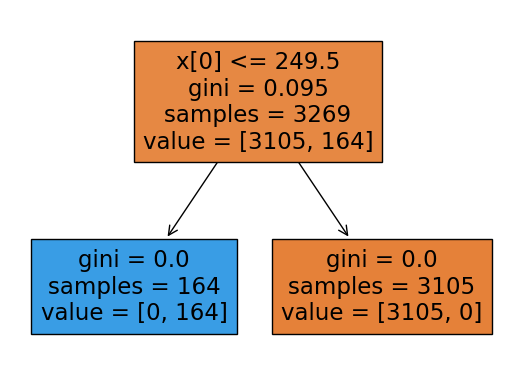

In [60]:
## Decision Trees sample code:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=10) # Fit the classifier
cont = model.fit(X_train, y_train)
tree.plot_tree(cont,filled=True)

## Make Predictions on the Test Set
y_hat_cont = cont.predict(X_test)

# Compute performance:
func_cont = func(y_test,y_hat_cont)
print(func_cont)

In [61]:
print('R2:',R2_cart)
print('MSE', MSE_cart)


R2: 1.0
MSE 0.0


Obviously this is not helpful as it only predicts two points on a graph and therefore has an R2 of 1 and an RMSE of 0. However, there are many more data points than that.

This is supposed to be fairly "fun," so please do not turn it into a combinatorial nightmare of comparing thousands of model specifications. Settle on a strategy you think is promising, crank it out, and write up the results. Your time and energy are valuable, so learn to recognize when the marginal cost of another twenty minutes on a project exceeds the benefit in terms of improving the results and your grade.
  
## Paper format

The format of the paper should be:

  - Summary: A one paragraph description of the question, methods, and results (about 350 words).
  - Data: One to two pages discussing the data and key variables, and any challenges in reading, cleaning, and preparing them for analysis.
  - Results: Two to five pages providing visualizations, statistics, a discussion of your methodology, and a presentation of your main findings.
  - Conclusion: One to two pages summarizing the project, defending it from criticism, and suggesting additional work that was outside the scope of the project.
  - Appendix: If you have a significant number of additional plots or table that you feel are essential to the project, you can put any amount of extra content at the end and reference it from the body of the paper.

## Submission

Half of each student's grade is based on their commits to the repo. Each student is expected to do something specific that contributes to the overall project outcome. Since commits are recorded explicitly by Git/GitHub, this is observable. A student can contribute by cleaning data, creating visualizations,performing analytic analyses,  or writing about results, but everyone has to do something substantial. A student's work doesn't need to make it into the final report to be valuable and substantial, and fulfill the requirement to make a contribution to the project.

The other half of each student's grade is based on the written report. Groups will work together on combining results and writing up findings in a Jupyter noteb,ok, using code chunks to execute Python commands and markdown chunks to structure the paper and provide exposition. The notebook should run on Colab or Rivana from beginning to end without any errors.

mbers submit.

## Criteria

The project is graded based on four criteria:

  - Project Concept: What is the strategy for building and testing the group's models? How did the group decide how to use the tools presented so far in class? How did the group compare the performance of the options considered, and settle on a final choice for submission?
  - Wrangling, EDA, and Visualization: How are are missing values handled? For variables with large numbers of missing values, to what extent do the data and documentation provide an explanation for the missing data? If multiple data sources are used, how are the data merged? For the main variables in the analysis, are the relevant data summarized and visualized through a histogram or kernel density plot where appropriate? Are basic quantitative features of the data addressed and explained? How are outliers characterized and addressed?
  - Analysis: What are the groups' main findings? Do the tables, plots, and statistics support the conclusions? Is the research strategy carried out correctly? If the research strategy succeeds, are the results interpreted correctly and appropriately? If the research strategy fails, is a useful discussion of the flaws of the data collection process or the research strategy discussed?
  - Replication/Documentation: Is the code appropriately commented? Can the main results be replicated from the code and original data files? Are significant choices noted and explained?

Each of the four criteria are equally weighted (25 points out of 100).